In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import itertools
import json
import pickle
import random
import sys

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import model_from_json
from keras import regularizers, optimizers
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import torch
from torchvision.utils import make_grid

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Set path so that functions can be imported from the utils script
sys.path.insert(0, '../')
from preprocess import sample_timeseries
from visualize import visualize_rgb, record_batch
from constants import *
import datasets
import util
import models


Using TensorFlow backend.


In [9]:
show_models = ['data_loader', 'crnn'] #, 'fcn_crnn', cnn', nn', 'rf', 'lr']

# For 'lr', 'rf', 'cnn', 'nn', normalize=False
# For fcn_crnn, clstm, normalize=True
normalize = True

train_parser = util.get_train_parser()
args = train_parser.parse_args(['--model_name', 'bidir_clstm', #fcn_crnn
                                '--dataset', 'full', 
                                '--num_classes', str(4),
                                '--country', 'ghana',
                                '--hdf5_filepath', '/home/data/ghana/data.hdf5',
                                '--batch_size', str(5),
                                '--hidden_dims', str(64), #32
                                '--crnn_num_layers', str(1),
                                '--use_s1', str(False),
                                '--use_s2', str(True),
                                '--sample_w_clouds', str(True),
                                '--include_clouds', str(True),
                                '--include_doy', str(True),
                                '--bidirectional', str(False), #True
                                '--shuffle', str(False),
                                '--normalize', str(normalize),
                                '--apply_transforms', str(False),
                                '--least_cloudy', str(True)])


In [10]:
#fcn_crnn_model_path = '/home/data/ghana/models/best_from_scratch_fcn_crnn'
#fcn_crnn_model_path = '/home/data/ghana/models/best_pretrained_fcn_crnn'
crnn_model_path = '/home/data/ghana/models/best_bidir_clstm'

dates = None
batch = args.batch_size
    

In [11]:
dataloaders = datasets.get_dataloaders('/home/data/ghana', 'ghana', 'full', args=args)
dl = dataloaders['test']
split = 'test'
vis_data = None
vis = None

if 'cnn' in show_models:
    model_json = '/home/data/ghana/models/best_1dcnn_model.json'
    model_hdf5 = '/home/data/ghana/models/best_1dcnn_model.hdf5'

    # load json and create model
    json_file = open(model_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model_cnn = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model_cnn.load_weights(model_hdf5)
    print("Loaded model from disk")
    # evaluate loaded model on test data
    loaded_model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
if 'nn' in show_models:
    model_json = '/home/data/ghana/models/best_1dnn_model.json'
    model_hdf5 = '/home/data/ghana/models/best_1dnn_model.hdf5'

    # load json and create model
    json_file = open(model_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model_nn = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model_nn.load_weights(model_hdf5)
    print("Loaded model from disk")
    # evaluate loaded model on test data
    loaded_model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

if 'rf' in show_models:
    filename = '/home/data/ghana/models/random_forest_model'
    loaded_model_rf = pickle.load(open(filename, 'rb'))
    
if 'lr' in show_models:
    filename = '/home/data/ghana/models/logistic_regression_model'
    loaded_model_lr = pickle.load(open(filename, 'rb'))
    
if 'cnn' in show_models or 'nn' in show_models:
    X_train = np.load('/home/data/ghana/pixel_arrays/full/raw/full_raw_s2_cloud_mask_reverseFalse_bytime_Xtrain_g2260.npy')
    # Normalize by standard scalar
    scaler = StandardScaler()
    print(X_train.shape)
    scaler.fit(X_train)
        


In [12]:
def reshape_channels(array, num_bands=11):
    bs = []
    for b in range(num_bands):
        bs.append(array[:, b::num_bands])
    return np.dstack(bs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


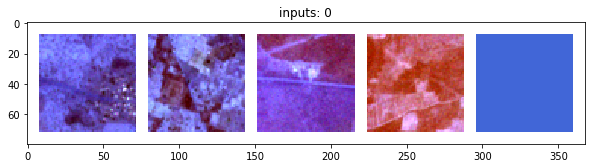

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


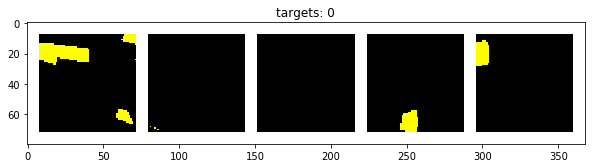

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


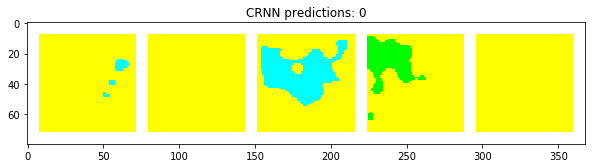

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


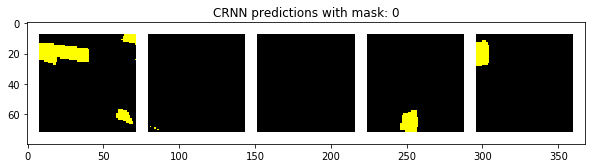

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


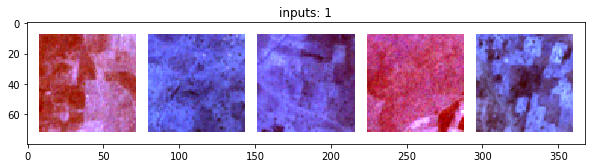

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


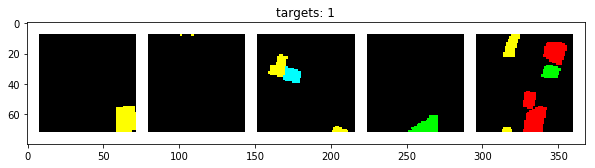

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


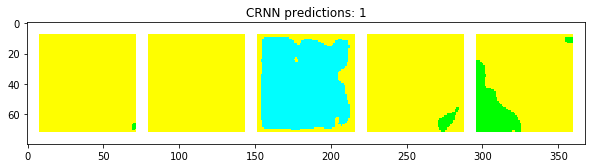

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


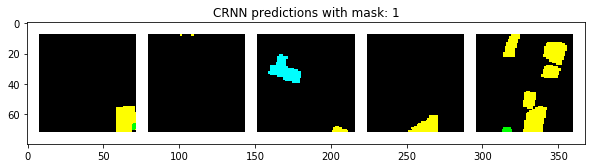

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


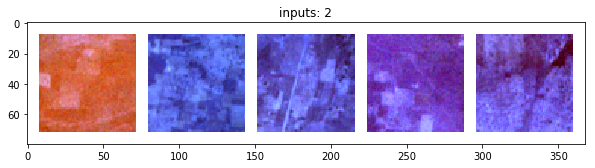

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


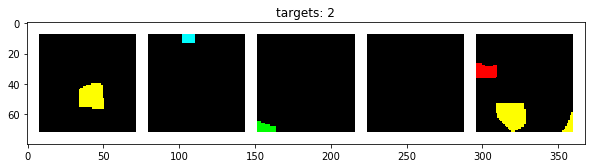

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


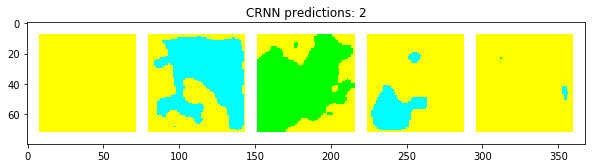

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


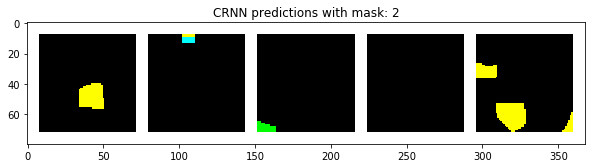

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


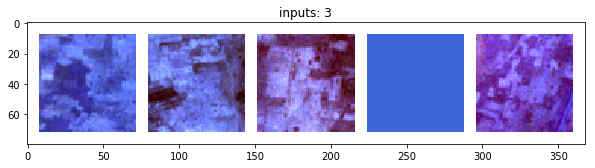

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


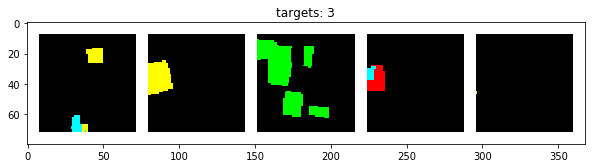

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


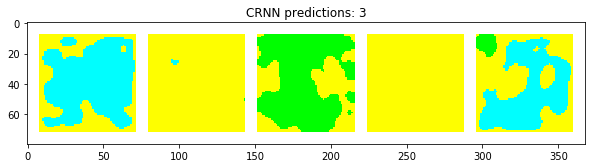

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


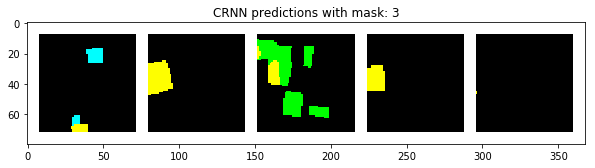

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


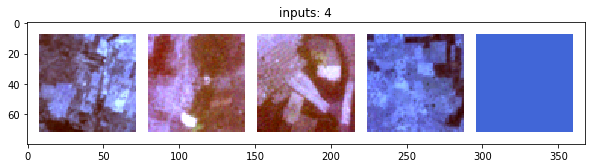

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


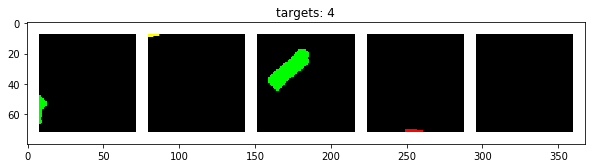

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


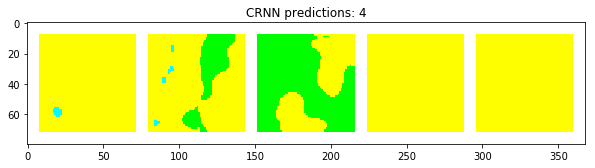

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


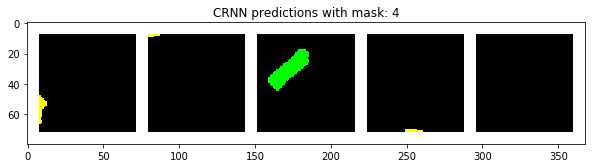

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


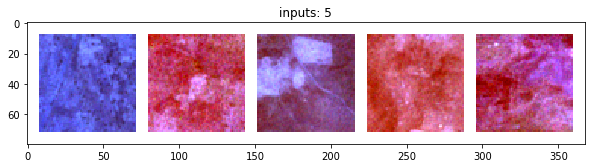

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


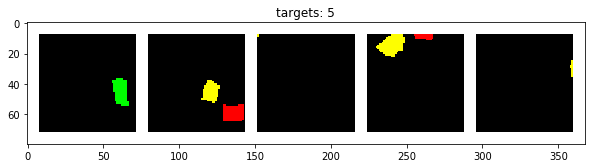

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


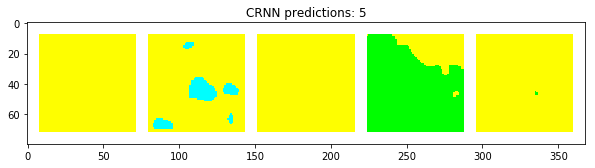

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


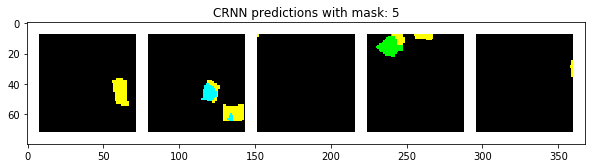

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


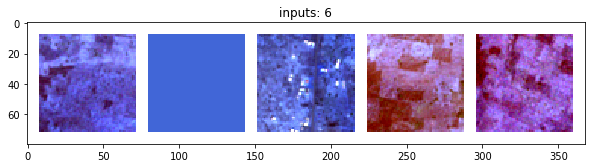

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


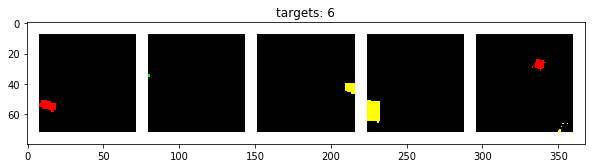

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


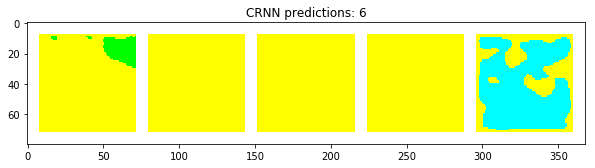

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


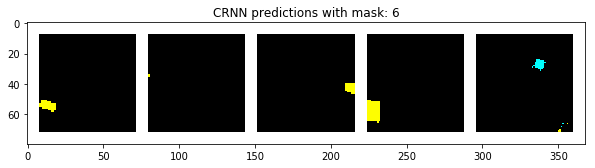

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


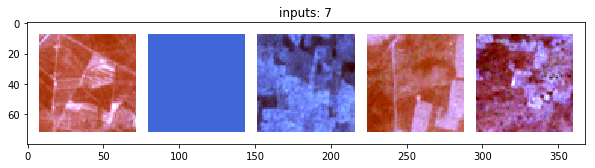

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


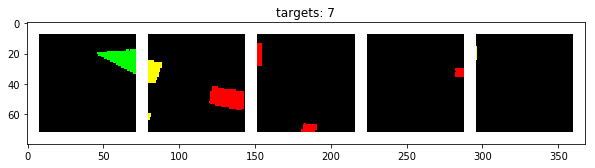

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


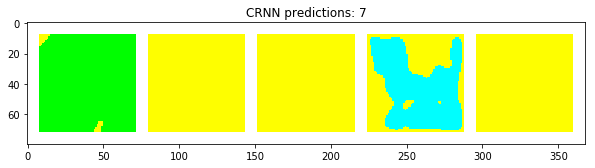

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


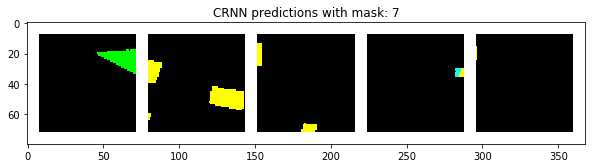

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


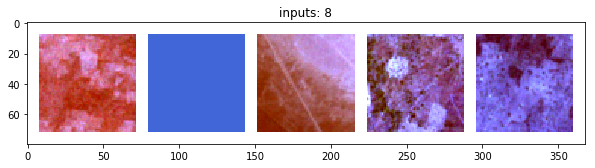

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


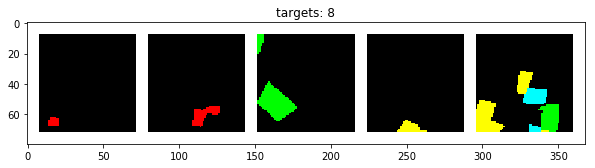

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


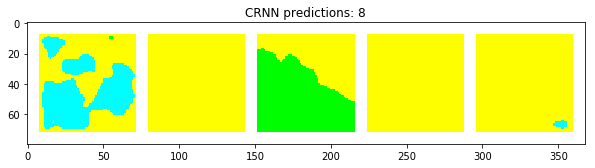

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


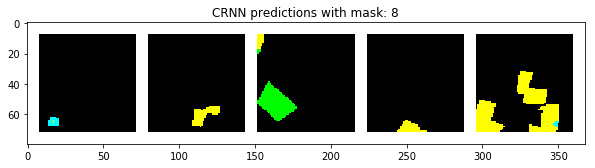

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


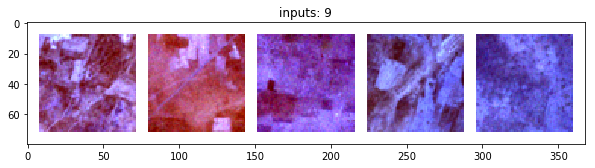

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


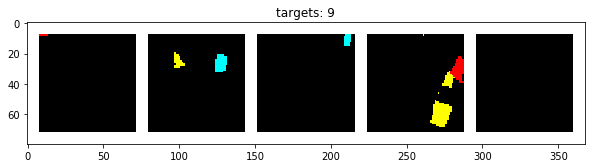

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


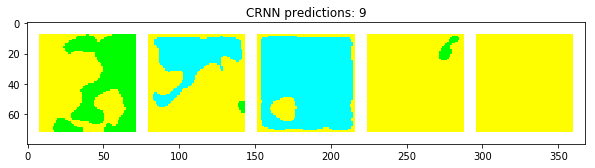

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


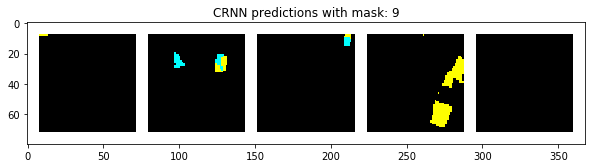

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


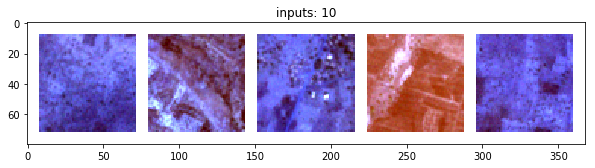

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


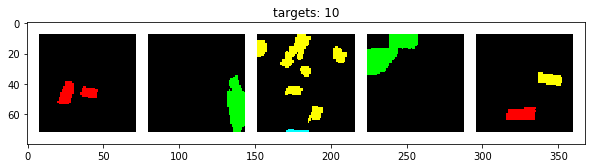

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


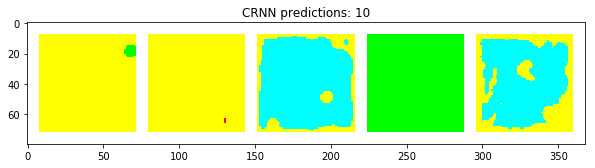

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


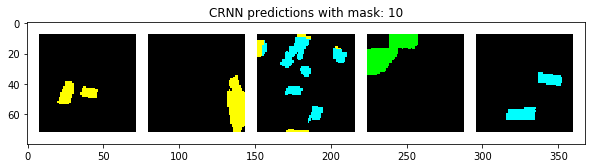

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


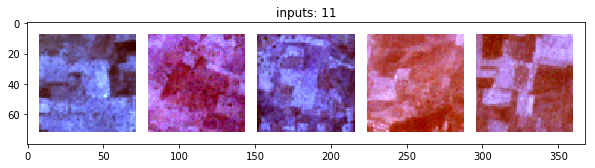

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


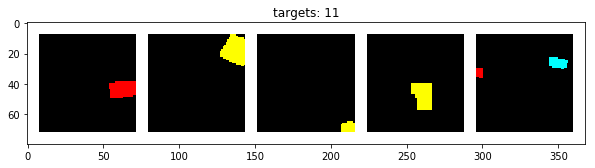

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


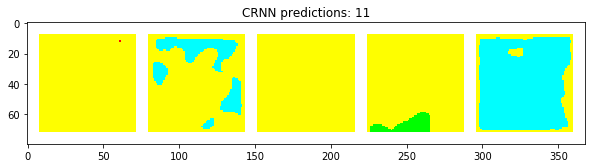

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


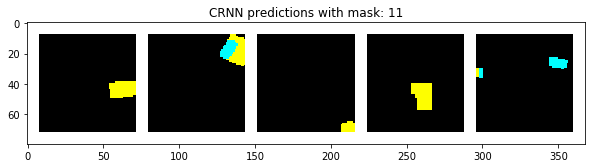

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


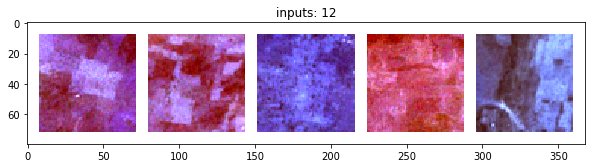

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


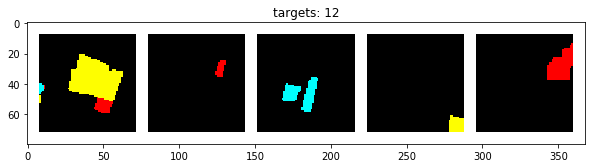

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


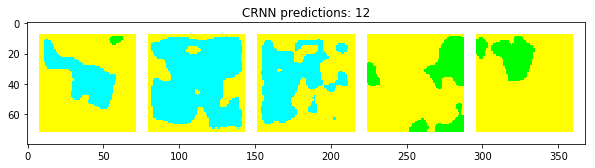

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


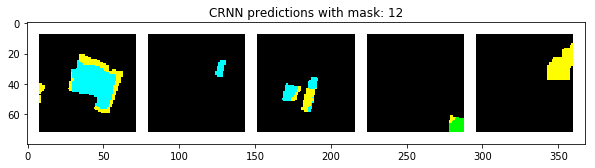

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


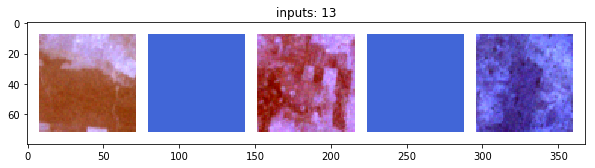

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


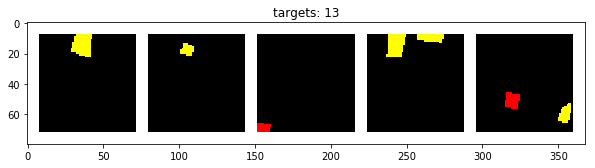

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


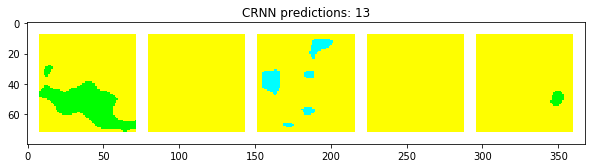

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


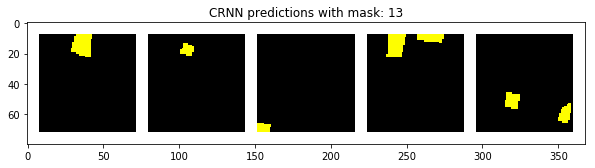

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


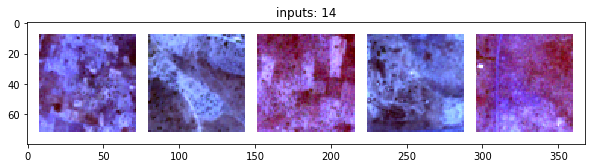

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


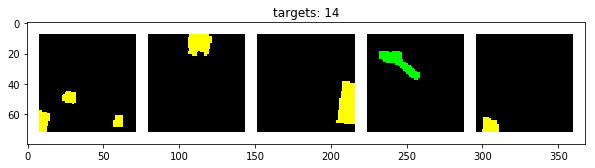

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


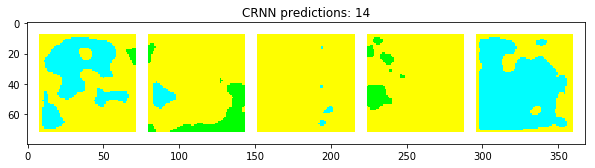

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


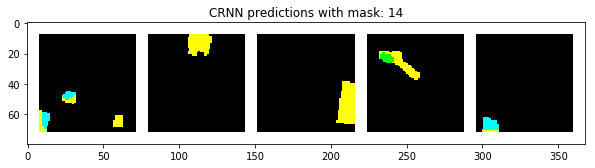

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


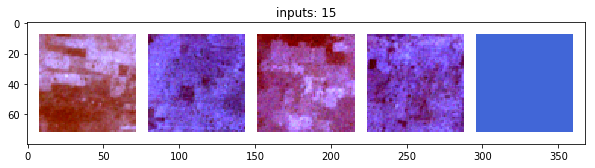

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


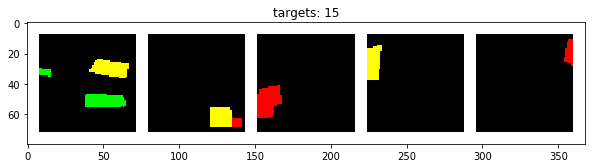

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


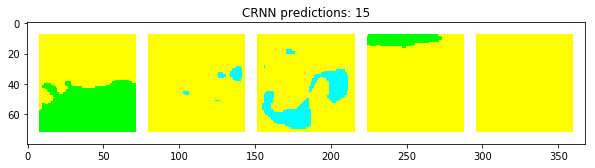

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


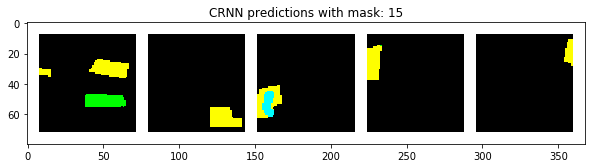

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


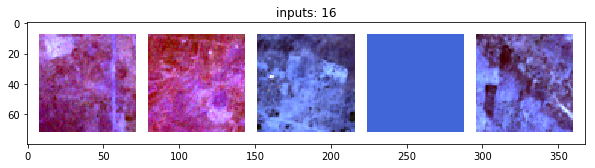

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


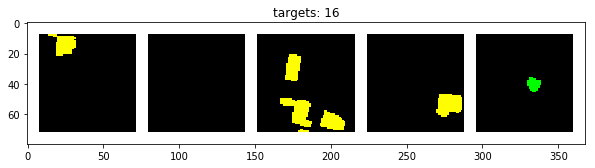

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


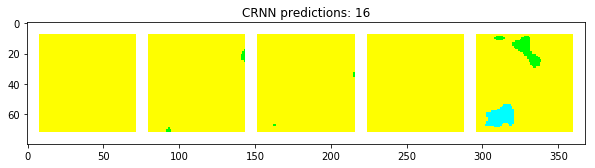

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


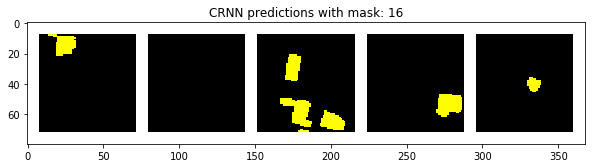

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


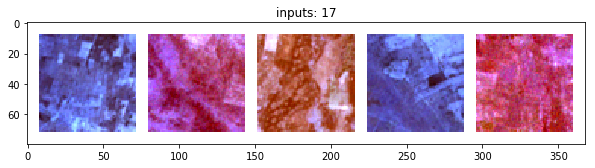

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


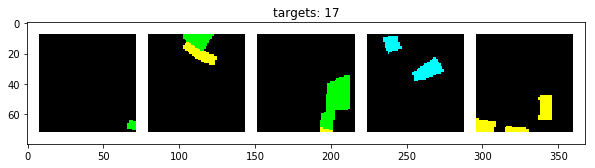

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


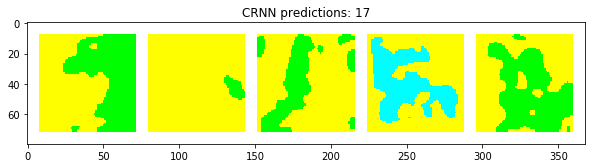

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


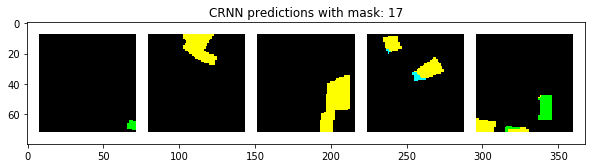

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


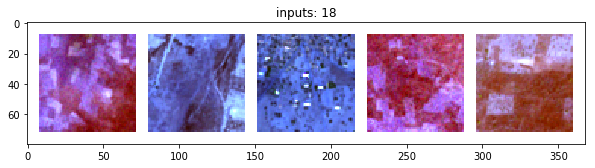

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


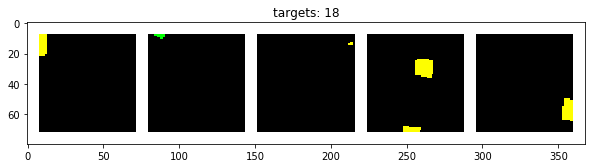

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


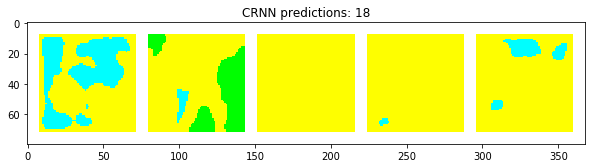

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


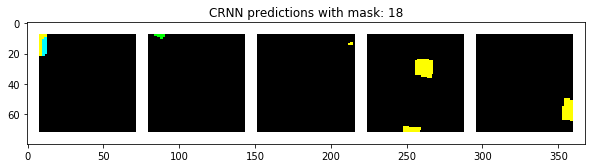

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


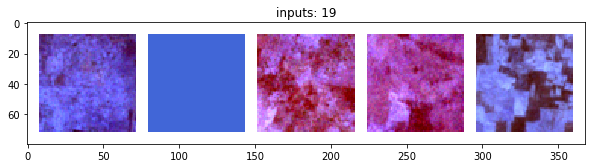

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


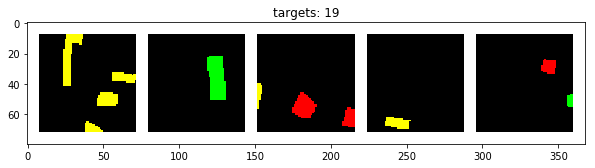

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


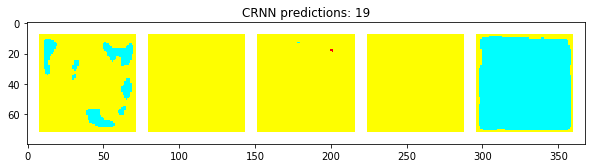

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


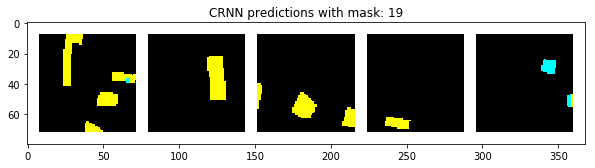

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


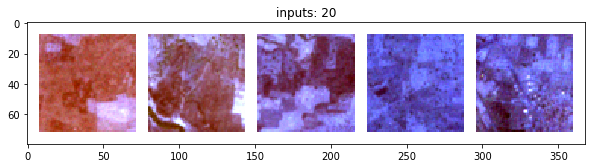

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


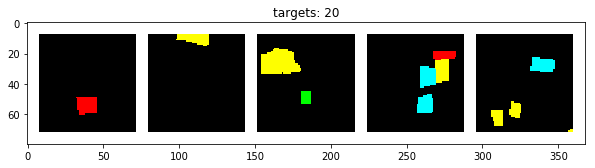

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


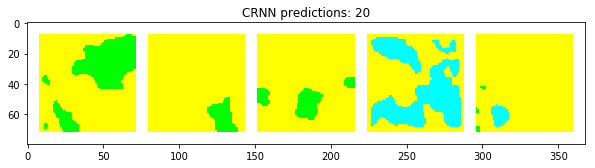

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


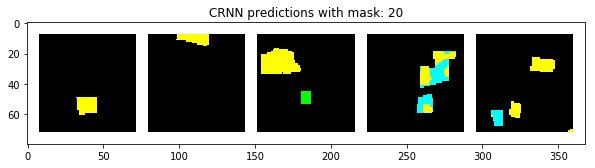

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


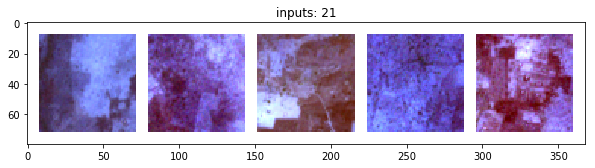

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


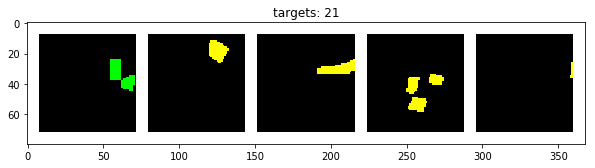

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


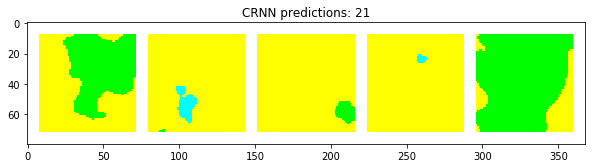

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


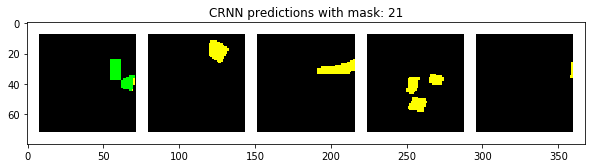

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


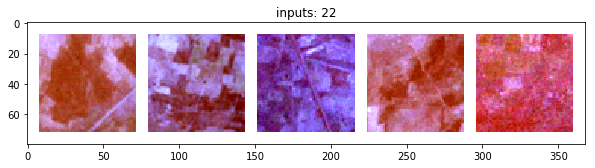

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


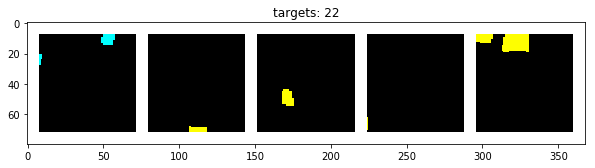

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


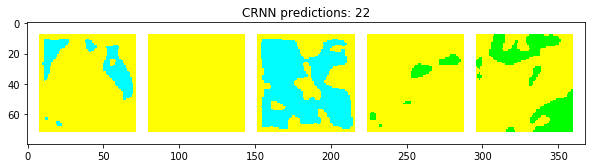

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


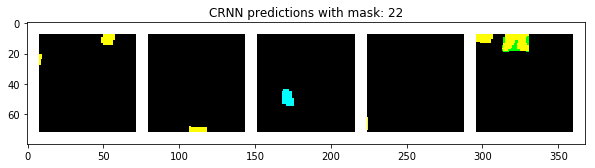

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


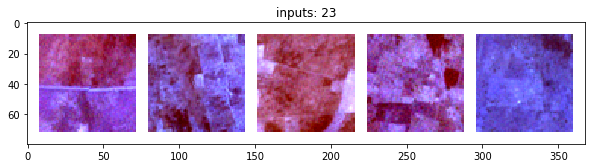

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


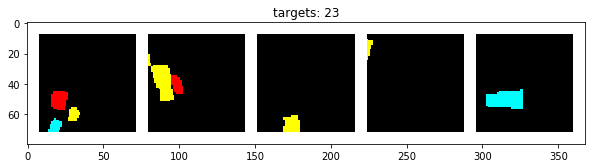

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


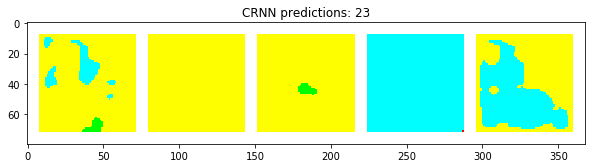

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


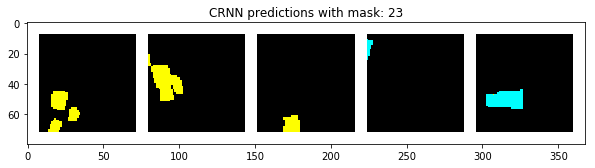

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


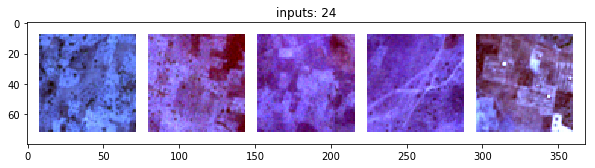

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


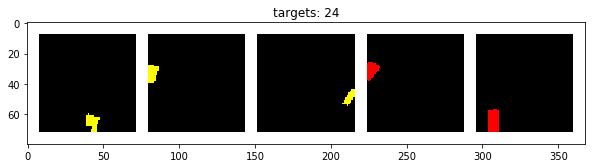

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


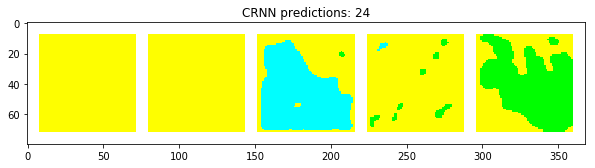

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


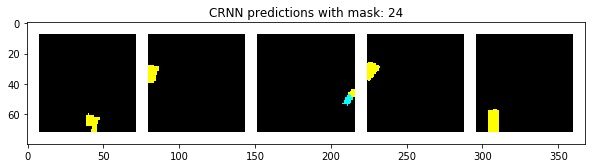

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


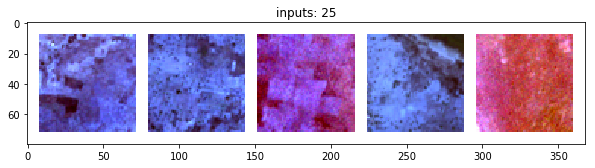

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


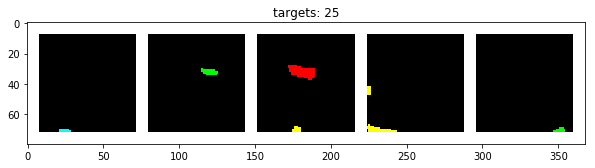

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


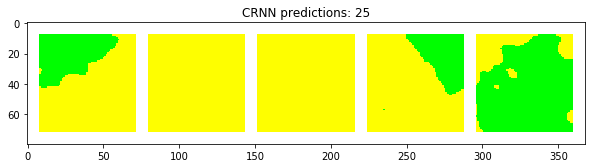

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


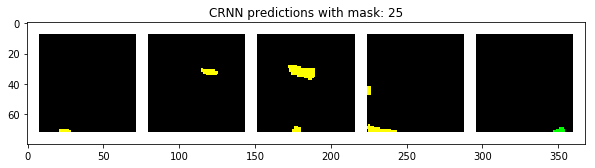

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


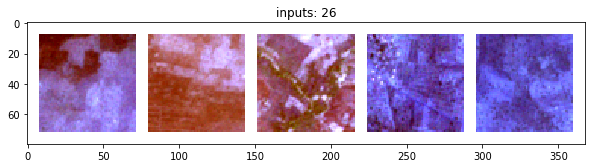

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


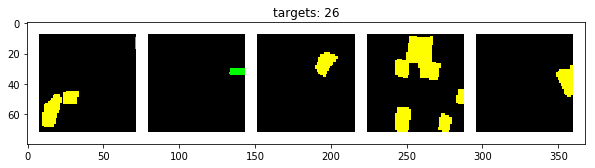

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


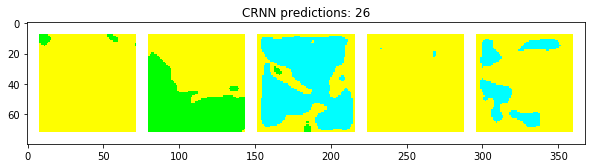

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


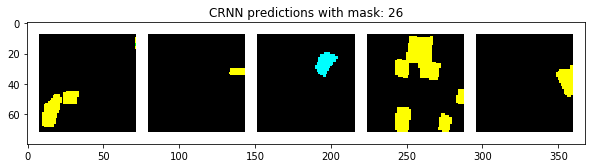

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


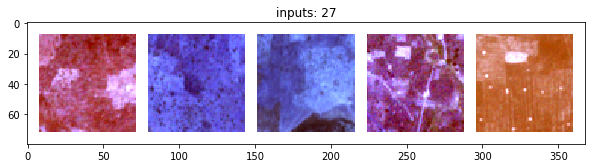

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


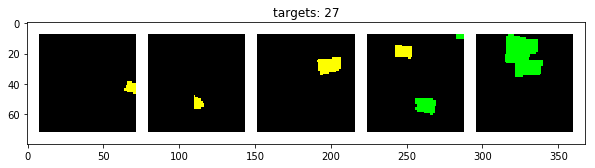

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


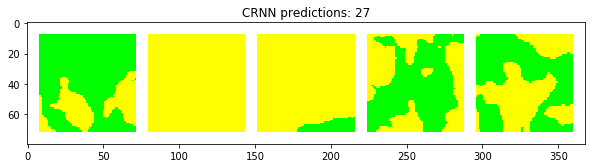

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


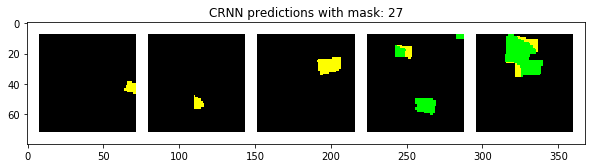

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


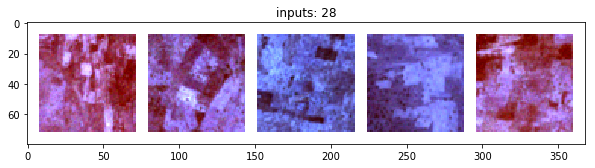

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


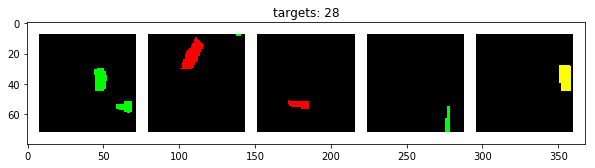

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


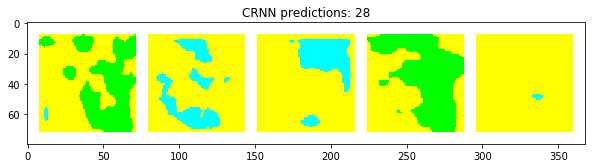

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


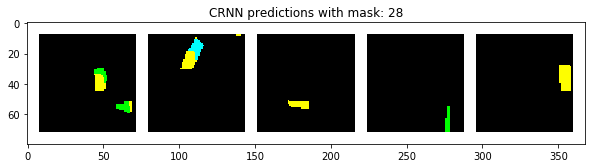

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


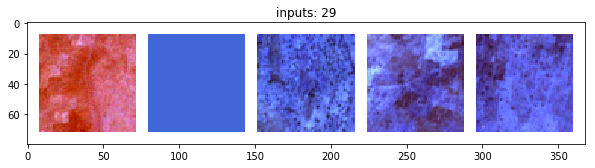

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


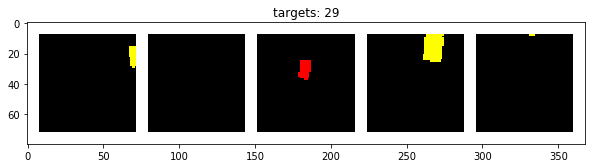

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


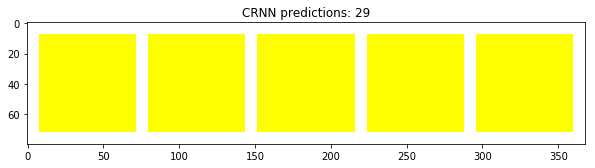

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


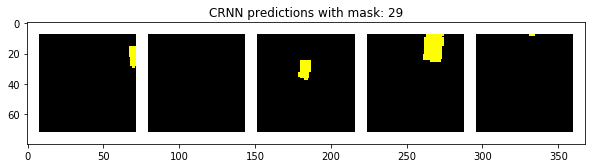

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


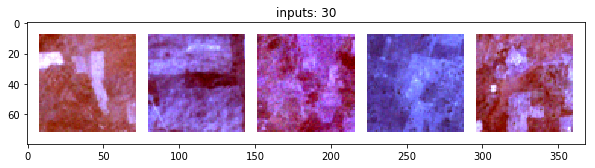

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


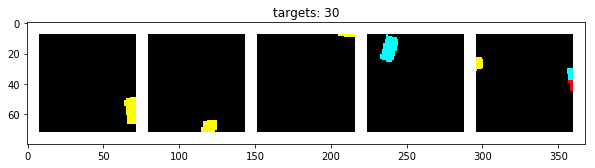

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


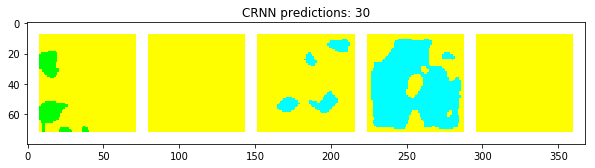

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


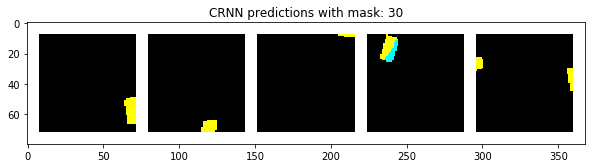

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


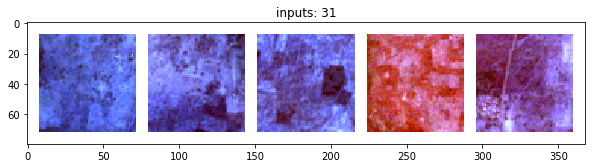

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


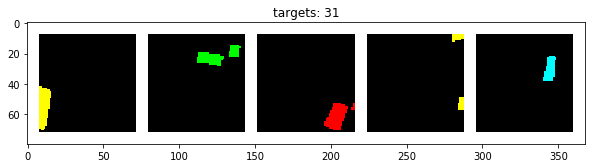

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


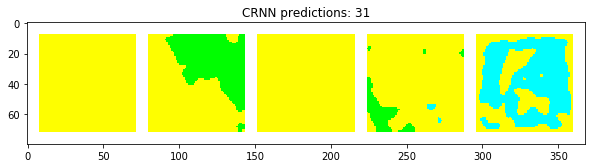

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


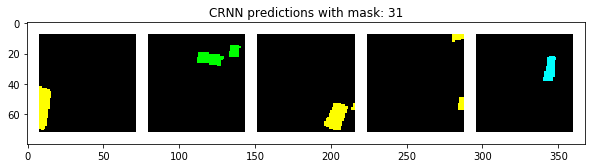

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


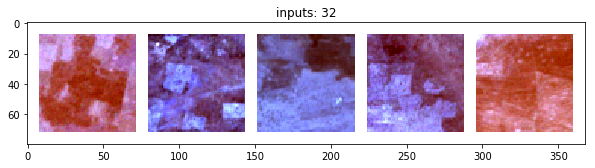

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


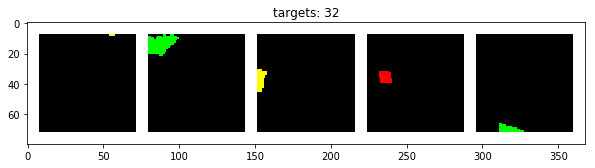

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


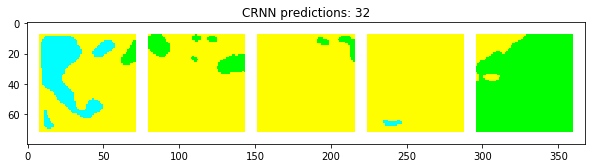

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


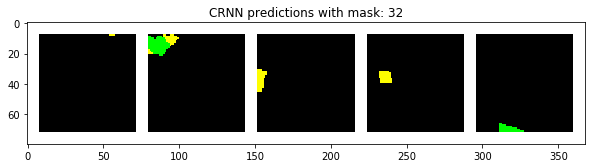

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


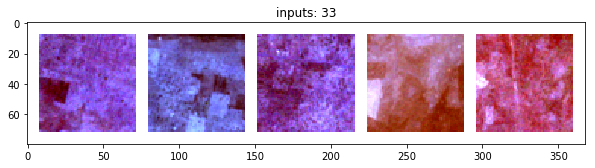

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


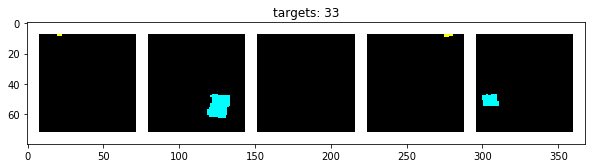

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


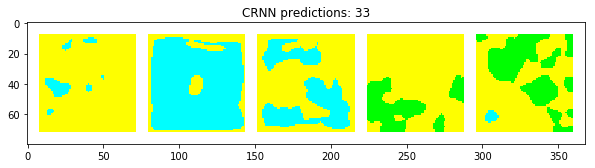

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


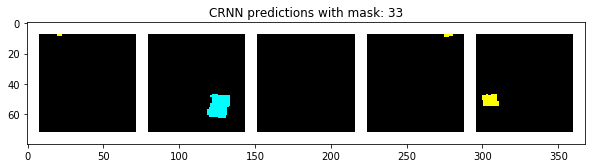

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


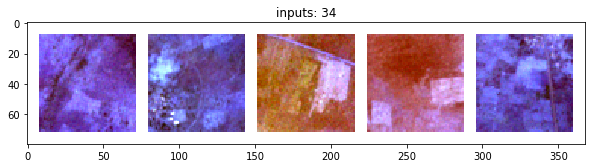

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


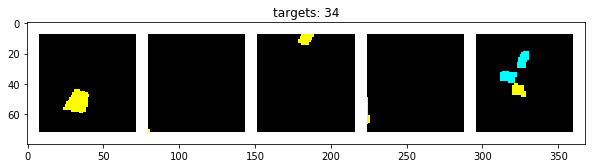

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


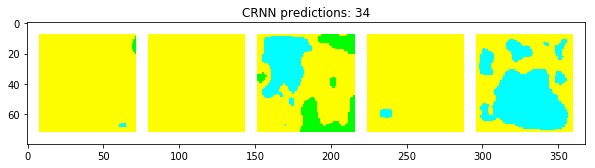

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


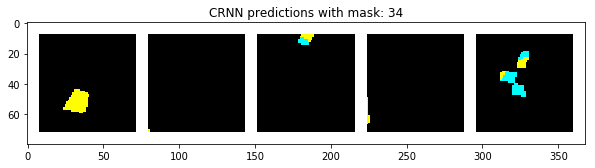

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


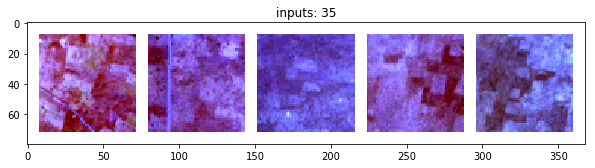

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


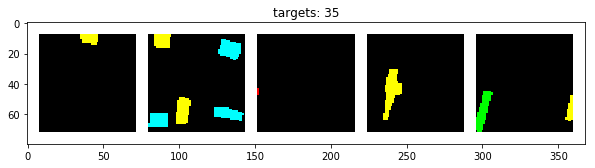

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


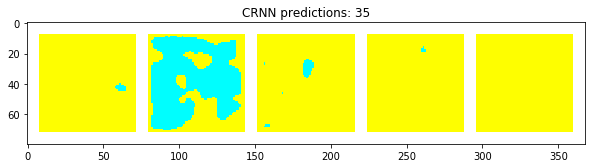

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


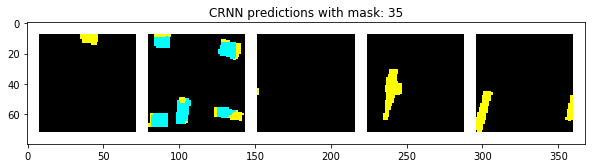

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


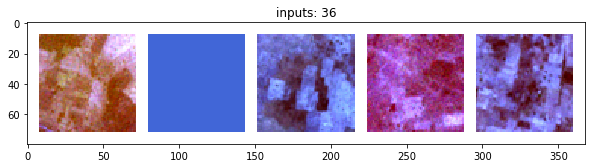

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


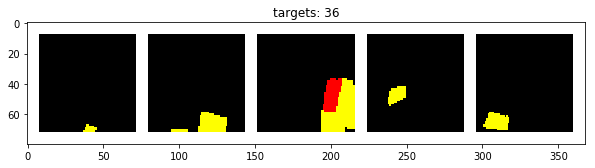

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


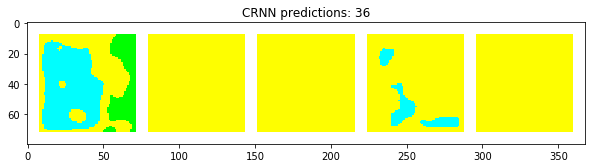

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


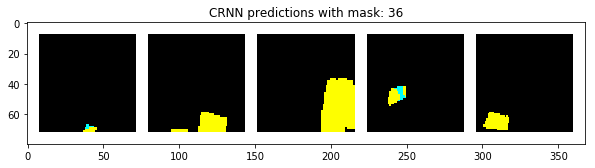

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


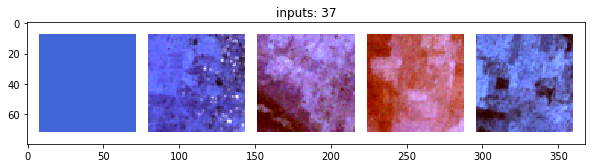

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


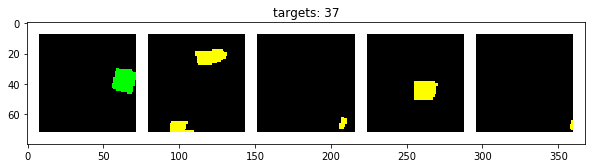

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


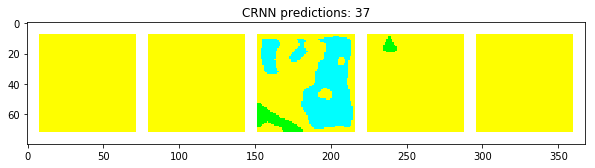

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


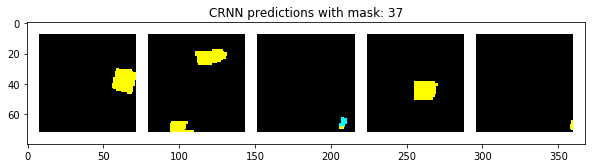

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


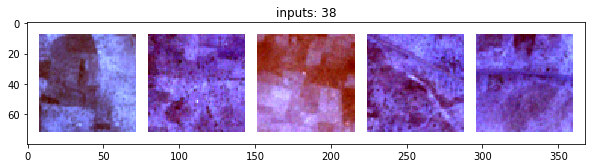

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


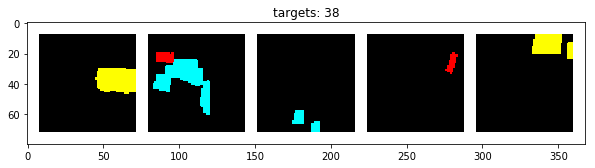

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


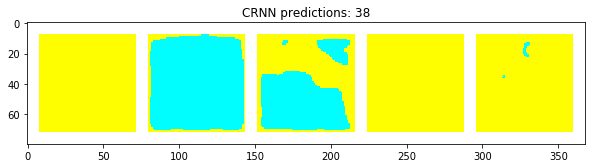

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


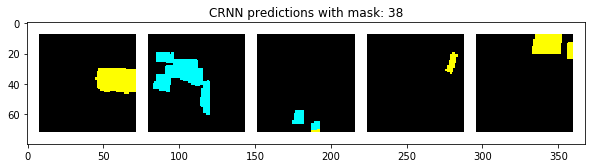

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


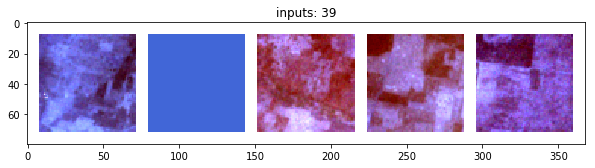

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


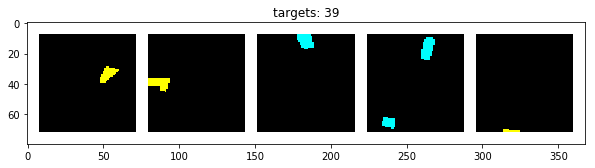

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


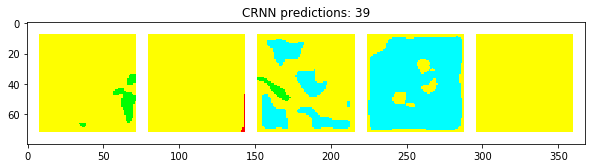

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


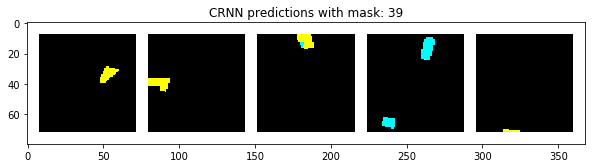

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


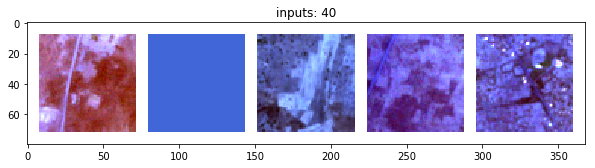

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


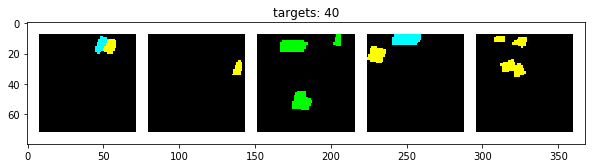

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


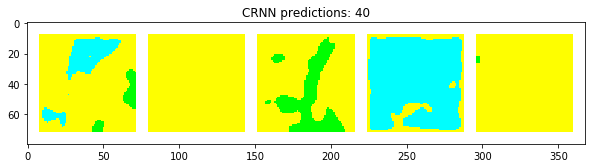

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


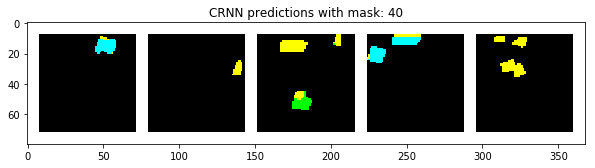

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


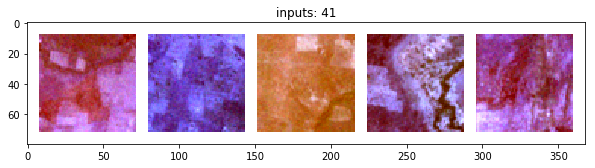

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


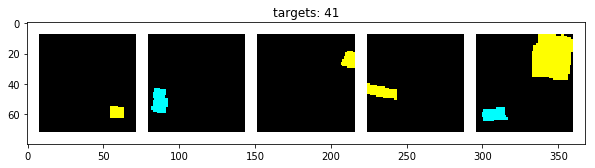

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


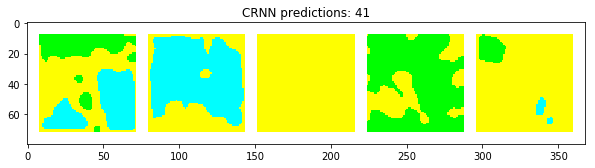

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


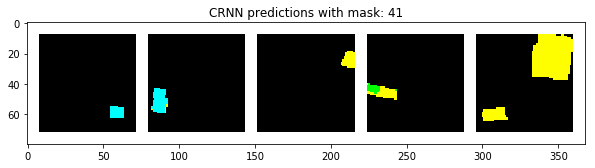

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


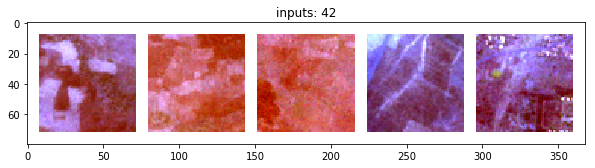

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


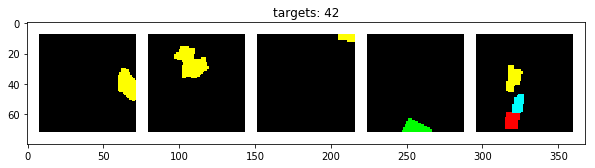

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


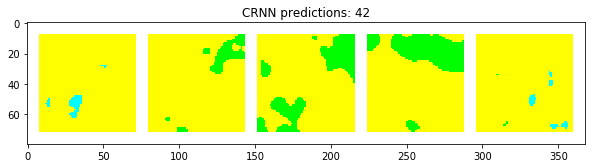

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


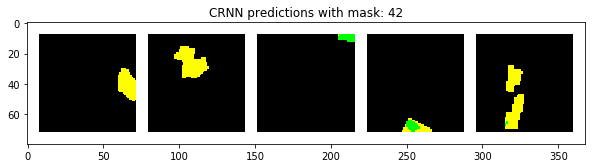

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


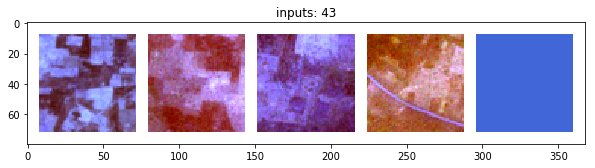

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


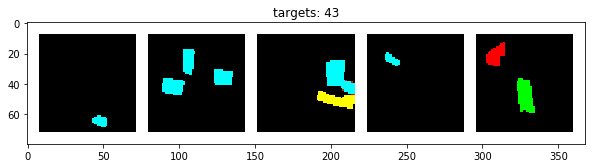

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


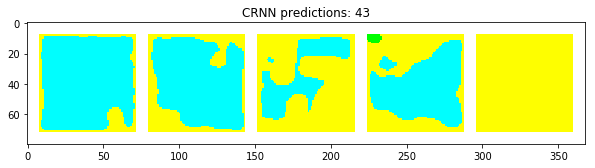

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


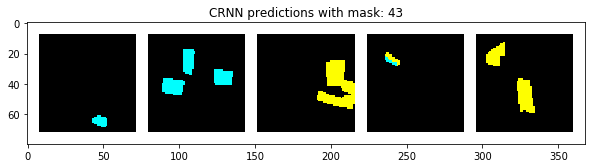

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


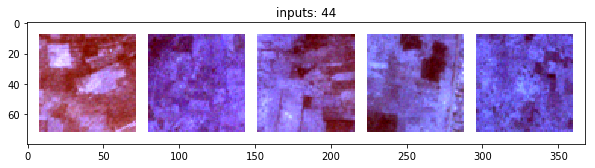

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


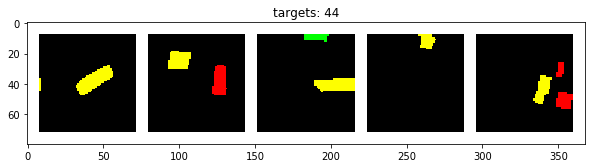

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


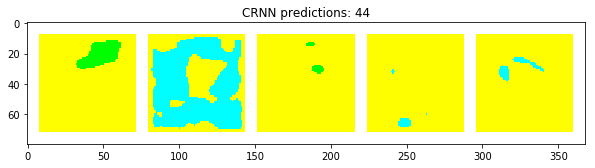

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


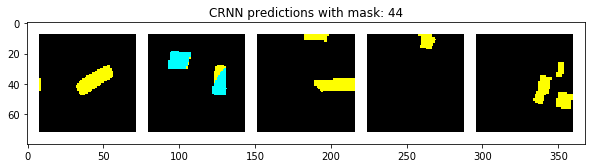

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


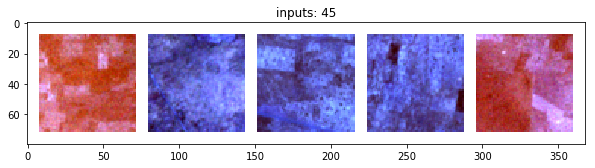

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


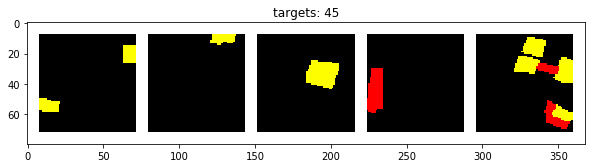

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


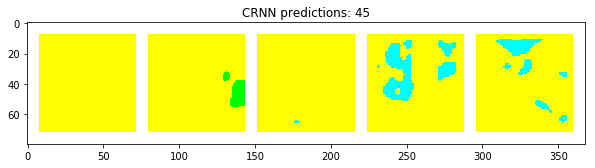

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


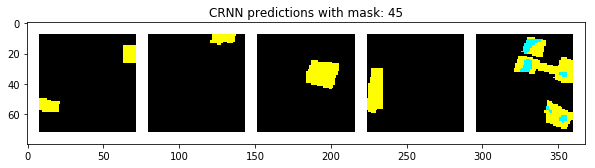

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


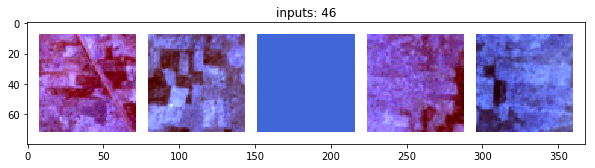

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


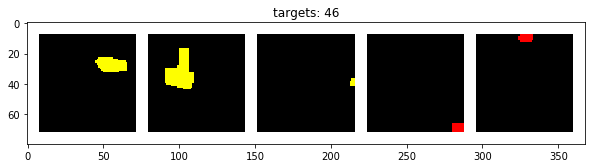

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


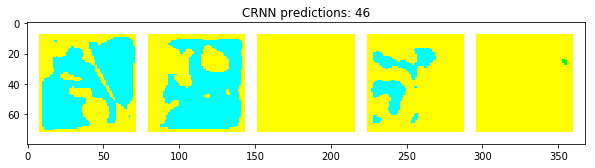

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


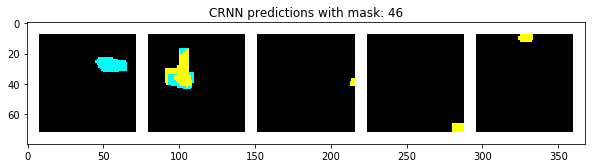

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


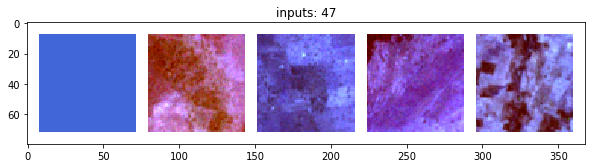

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


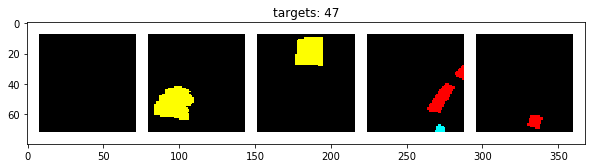

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


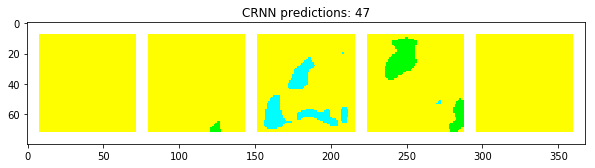

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


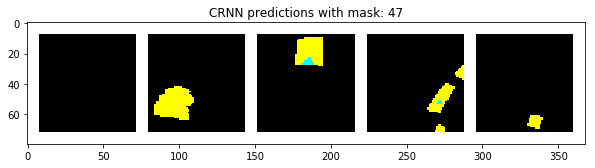

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


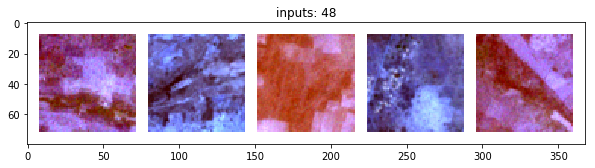

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


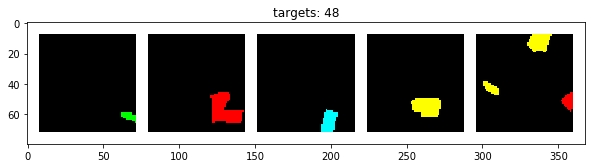

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


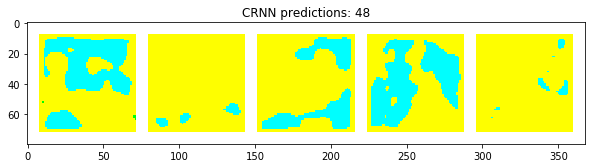

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


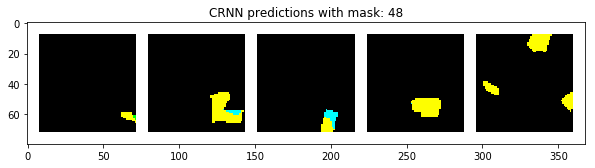

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


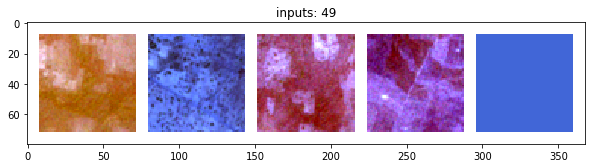

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


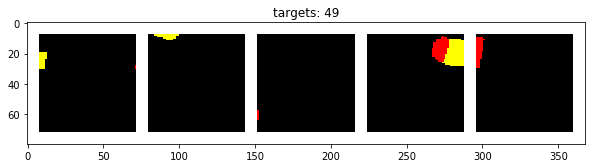

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


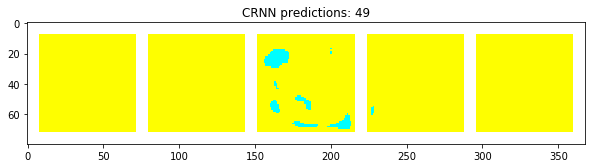

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


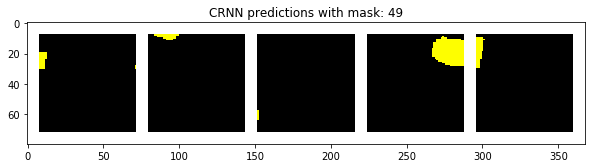

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


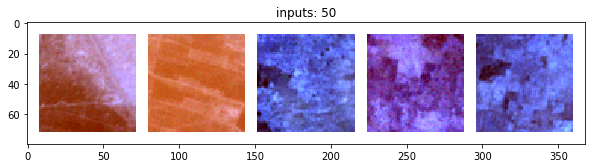

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


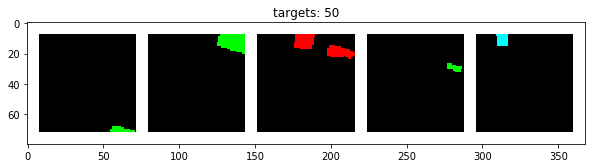

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


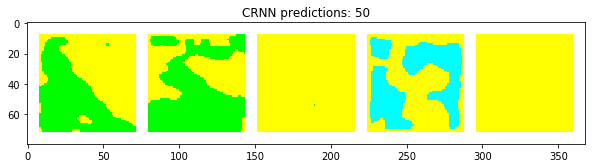

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


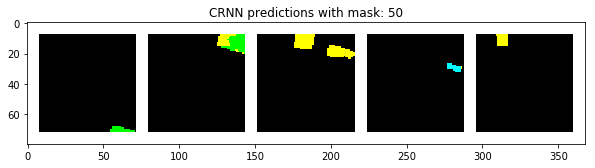

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


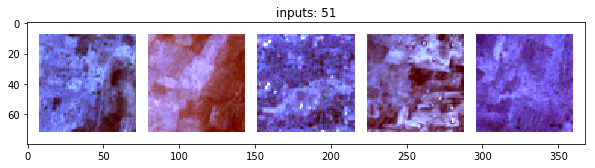

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


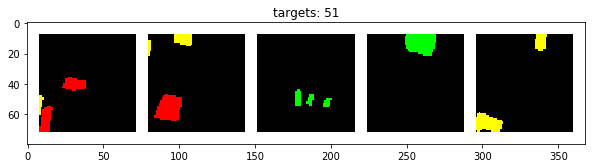

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


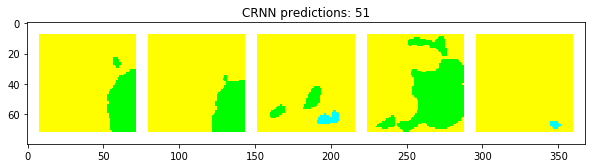

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


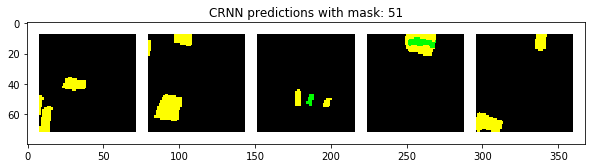

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


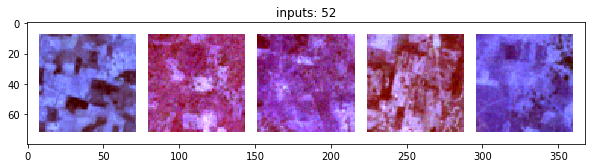

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


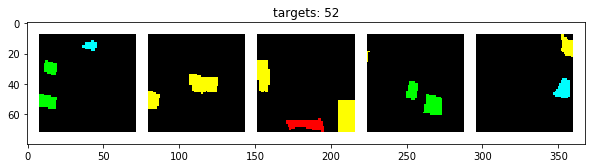

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


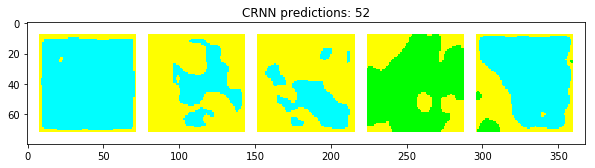

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


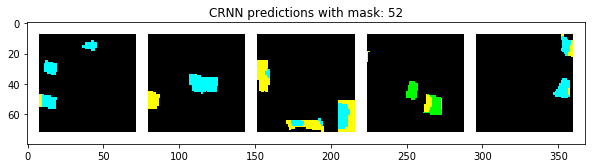

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


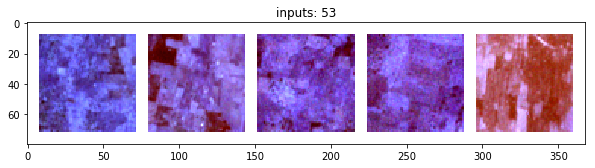

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


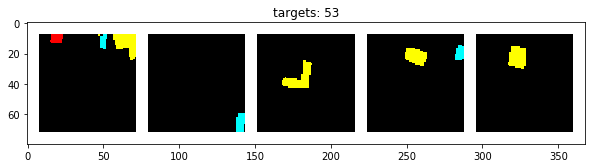

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


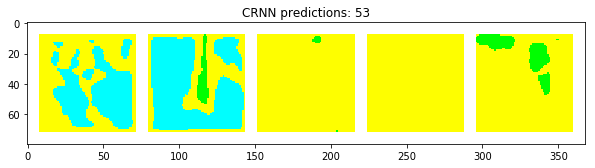

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


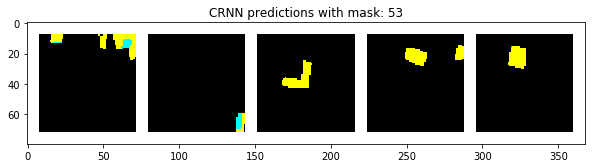

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


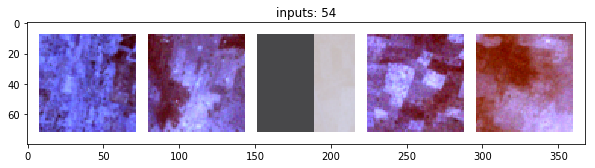

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


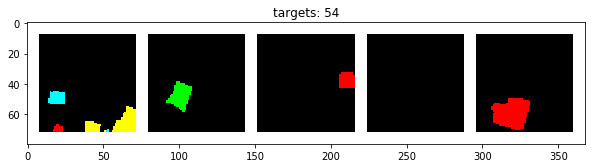

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


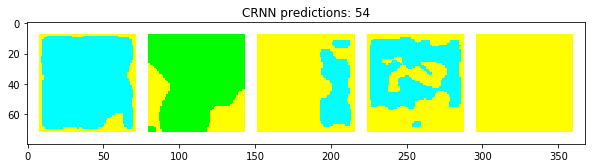

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


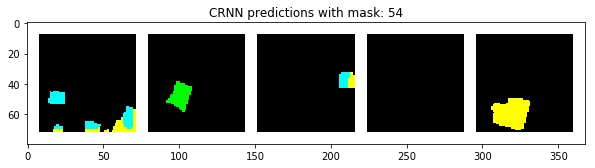

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


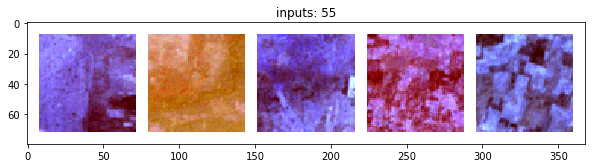

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


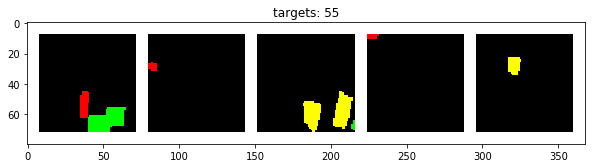

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


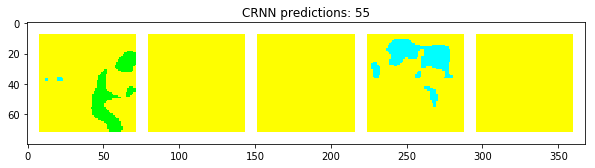

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


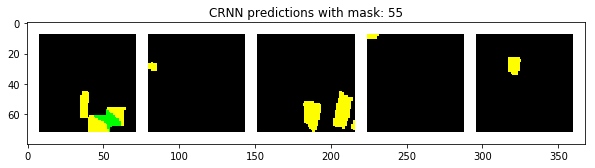

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


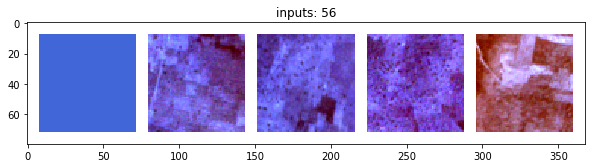

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


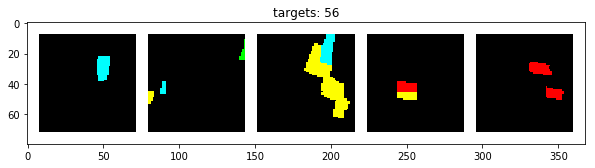

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


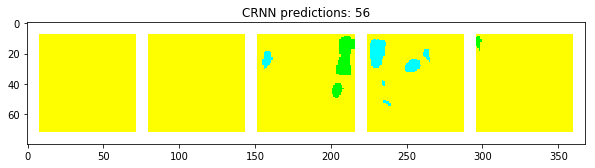

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


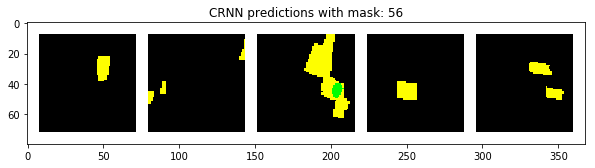

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


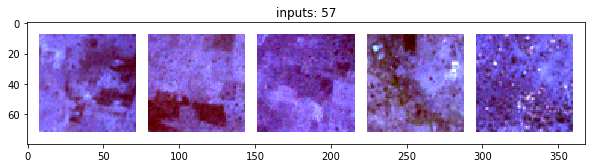

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


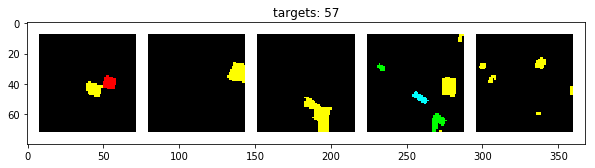

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


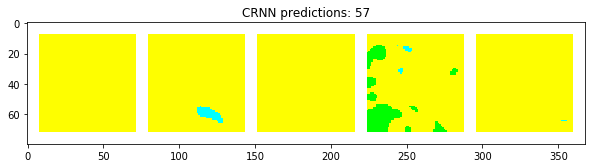

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


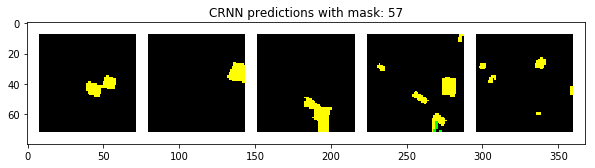

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


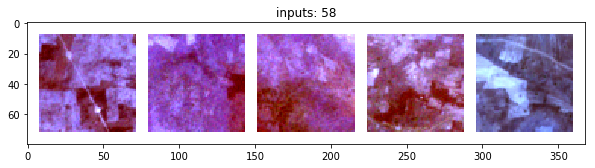

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


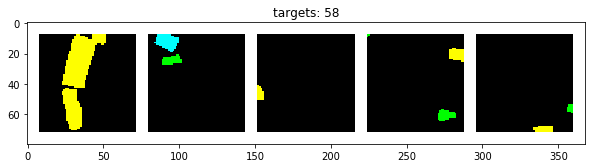

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


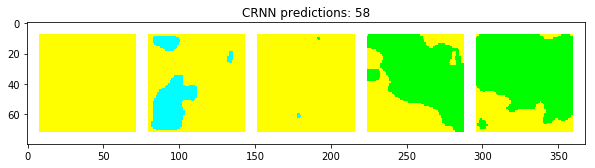

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


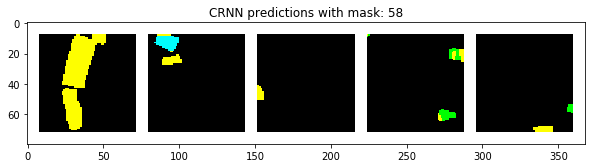

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


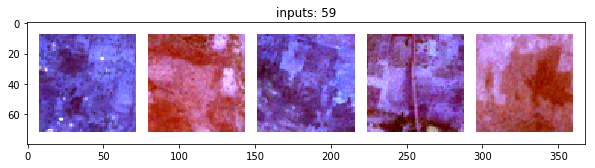

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


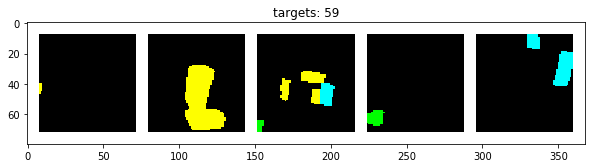

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


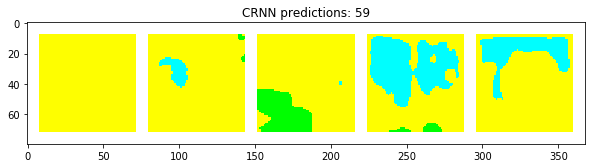

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


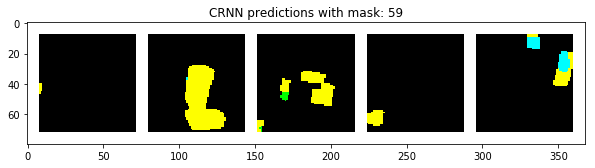

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


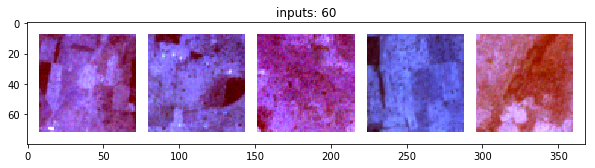

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


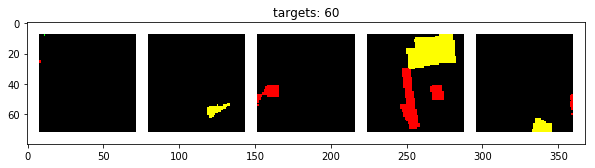

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


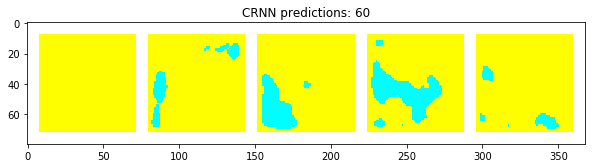

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


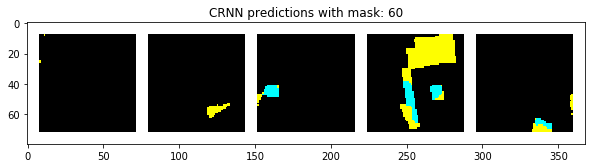

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


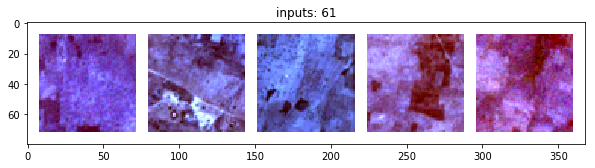

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


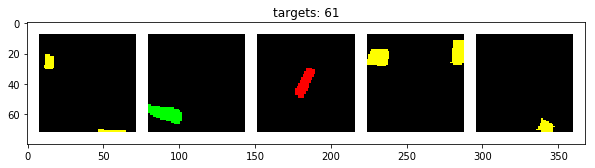

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


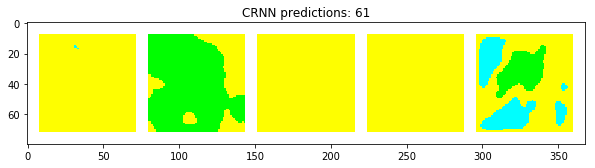

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


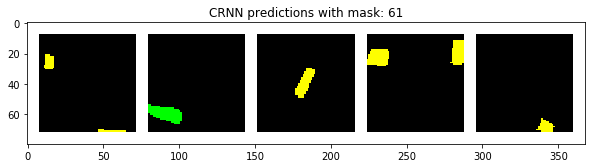

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


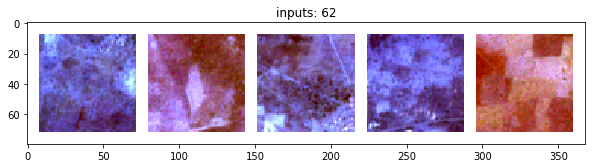

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


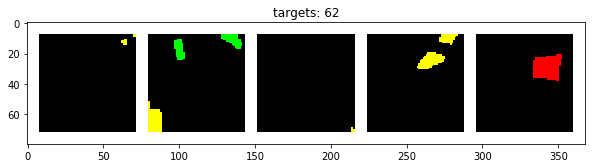

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


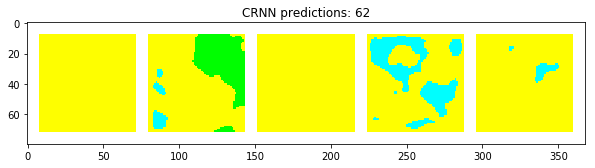

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


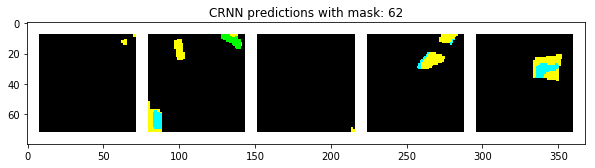

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


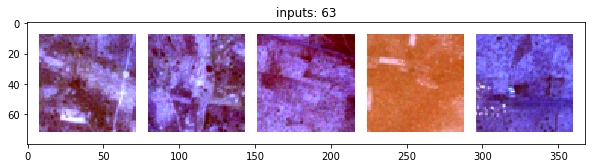

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


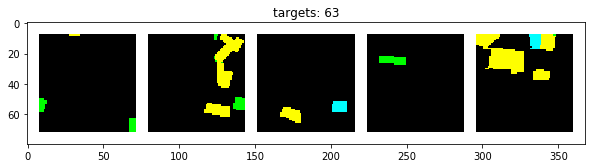

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


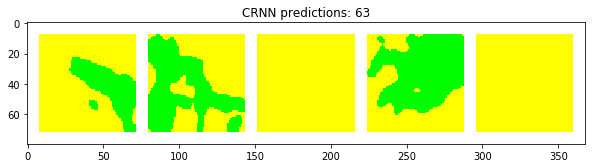

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


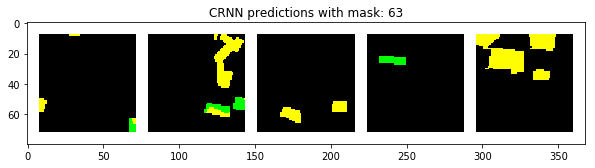

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


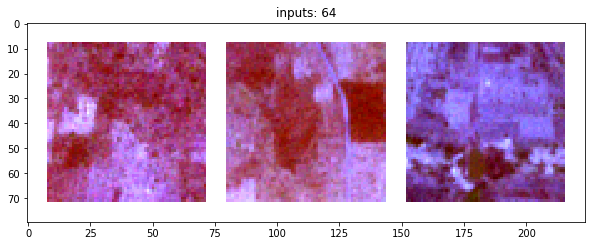

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


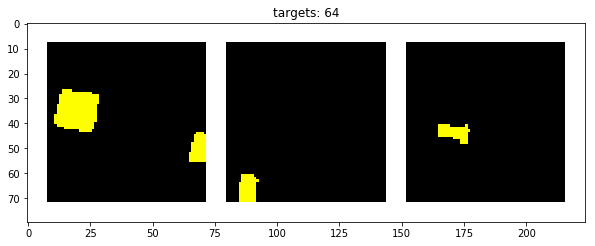

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


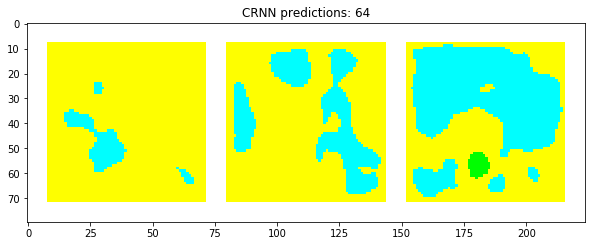

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


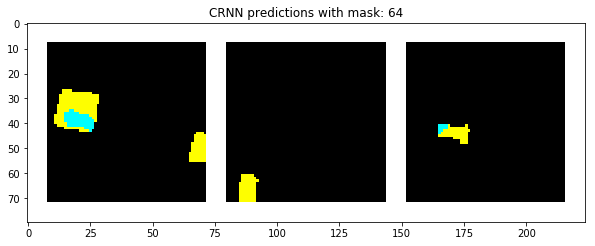

In [21]:
if 'data_loader' in show_models:
    model_name = 'fcn_crnn'
    if 'fcn_crnn' in show_models:
        fcn_crnn_model = models.get_model(**vars(args))
        fcn_crnn_model.load_state_dict(torch.load(fcn_crnn_model_path))
        fcn_crnn_model.eval()
        
    if 'crnn' in show_models:
        model_name = 'bidir_clstm'
        crnn_model = models.get_model(**vars(args))
        crnn_model.load_state_dict(torch.load(crnn_model_path))
        crnn_model.eval()
        crnn_model.to(device=args.device)
  
    count = 0
    for inputs, targets, cloudmasks in dl:
        if 'fcn_crnn' in show_models:
            preds = fcn_crnn_model(inputs)
        elif 'crnn' in show_models:
            preds = crnn_model(inputs)
        else:
            preds = torch.zeros(5, 4, 64, 64)
            # preds torch.Size([5, 4, 64, 64])
        labels_grid, inputs_grid, targets_grid, preds_grid, predsmask_grid = record_batch(
                                                                           inputs, cloudmasks, targets, preds, #<< preds
                                                                           args.num_classes, split, vis_data, 
                                                                           vis, args.include_doy, args.use_s1, 
                                                                           args.use_s2, model_name, args.time_slice, 
                                                                           save=False, save_dir=None, 
                                                                           show_visdom=False, show_matplot=True)
        
        #plt.figure(figsize=(10,10))
        #plt.imshow(np.transpose(labels_grid, (1, 2, 0)))
        #plt.title('labels')
        #plt.show()
        
        plt.figure(figsize=(10,10))
        plt.imshow(np.transpose(inputs_grid, (1, 2, 0)))
        plt.title('inputs: {}'.format(count))
        plt.show()
    
        plt.figure(figsize=(10,10))
        plt.imshow(np.transpose(targets_grid, (1, 2, 0)))
        plt.title('targets: {}'.format(count))
        plt.show()
        
        if model_name == 'fcn_crnn':
            plt.figure(figsize=(10,10))
            plt.imshow(np.transpose(preds_grid, (1, 2, 0)))
            plt.title('FCN CRNN predictions: {}'.format(count))
            plt.show()
        
            plt.figure(figsize=(10,10))
            plt.imshow(np.transpose(predsmask_grid, (1, 2, 0)))
            plt.title('FCN CRNN predictions with mask: {}'.format(count))
            plt.show()
            
        elif model_name == 'bidir_clstm':
            plt.figure(figsize=(10,10))
            plt.imshow(np.transpose(preds_grid, (1, 2, 0)))
            plt.title('CRNN predictions: {}'.format(count))
            plt.show()
        
            plt.figure(figsize=(10,10))
            plt.imshow(np.transpose(predsmask_grid, (1, 2, 0)))
            plt.title('CRNN predictions with mask: {}'.format(count))
            plt.show()
        
        if 'cnn' in show_models or 'nn' in show_models or 'rf' in show_models or 'lr' in show_models:
            b, t, c, h, w = inputs.shape
            data = np.transpose(inputs, (0, 3, 4, 1, 2))
            data = data[:, :, :, :, :11]
            #data = np.reshape(data, (b, -1, t*(c-1)))
            
            cur_batch_imgs_cnn = []
            cur_batch_imgs_nn = []
            cur_batch_imgs_rf = []
            cur_batch_imgs_lr = []
            
            for curb in range(b):
                
                if 'cnn' in show_models:
                    data_in = data[curb,:, :, :, :] #
                    data_cnn = np.transpose(data_in, (3, 0, 1, 2))#
                    data_cnn = np.reshape(data_cnn, (c-1, h*w, t)) #
                    data_cnn = np.swapaxes(data_cnn, 0, 1) #
                    data_cnn = np.swapaxes(data_cnn, 1, 2).reshape(data_cnn.shape[0], -1)
                    
                    data_cnn = scaler.transform(data_cnn)
                    data_cnn = reshape_channels(data_cnn)      
                    
                    #data_in = np.reshape(data, (b, -1, t*(c-1)))
                    #data_in = scaler.transform(data_in[curb,:, :])
                    #data_cnn = np.reshape(data_in, (64*64, -1, 11))     
                    pred_cnn = np.argmax(loaded_model_cnn.predict(data_cnn), axis=1) + 1
                    pred_cnn = np.reshape(pred_cnn, (1, 1, 64, 64))
                    pred_cnn = visualize_rgb(pred_cnn, num_classes=4)
                    cur_batch_imgs_cnn.append(pred_cnn)
                
                if 'nn' in show_models:
                    data_in = data[curb,:, :, :, :] #
                    data_nn = np.transpose(data_in, (3, 0, 1, 2))#
                    data_nn = np.reshape(data_nn, (c-1, h*w, t)) #
                    data_nn = np.swapaxes(data_nn, 0, 1) #
                    data_nn = np.swapaxes(data_nn, 1, 2).reshape(data_nn.shape[0], -1)
                    
                    data_nn = scaler.transform(data_nn)
                    data_nn = reshape_channels(data_nn)
                    
                    #data_in = np.reshape(data, (b, -1, t*(c-1)))
                    #data_in = scaler.transform(data_in[curb,:, :])
                    #data_nn = np.reshape(data_in, (64*64, -1, 11))     
                    pred_nn = np.argmax(loaded_model_nn.predict(data_nn), axis=1) + 1
                    pred_nn = np.reshape(pred_nn, (1, 1, 64, 64))
                    pred_nn = visualize_rgb(pred_nn, num_classes=4)
                    cur_batch_imgs_nn.append(pred_nn)
                    
                if 'rf' in show_models:
                    data_in = data[curb,:, :, :, :] #
                    data_rf = np.transpose(data_in, (3, 0, 1, 2))#
                    data_rf = np.reshape(data_rf, (c-1, h*w, t)) #
                    data_rf = np.swapaxes(data_rf, 0, 1) #
                    data_rf = np.swapaxes(data_rf, 1, 2).reshape(data_rf.shape[0], -1) #
                    
                    #data_rf = np.reshape(data_in, (64*64, -1, 11)) 
                    #data_rf = np.transpose(data_rf, (0, 2, 1))
                    #data_rf = np.reshape(data_rf, (64*64, -1))  
                    print('data rf: ', data_rf.shape)
                    pred_rf = loaded_model_rf.predict(data_rf)
                    pred_rf = np.reshape(pred_rf, (1, 1, 64, 64))
                    pred_rf = visualize_rgb(pred_rf, num_classes=4)
                    cur_batch_imgs_rf.append(pred_rf)

                if 'lr' in show_models:
                    data_in = data[curb,:, :, :, :] #
                    data_lr = np.transpose(data_in, (3, 0, 1, 2))#
                    data_lr = np.reshape(data_lr, (c-1, h*w, t)) #
                    data_lr = np.swapaxes(data_lr, 0, 1) #
                    data_lr = np.swapaxes(data_lr, 1, 2).reshape(data_lr.shape[0], -1) #
                    #data_in = data[curb,:, :]
                    #data_lr = np.reshape(data_in, (64*64, -1, 11)) 
                    #data_lr = np.transpose(data_lr, (0, 2, 1))
                    #data_lr = np.reshape(data_lr, (64*64, -1))  
                    pred_lr = loaded_model_lr.predict(data_lr)
                    pred_lr = np.reshape(pred_lr, (1, 1, 64, 64))
                    pred_lr = visualize_rgb(pred_lr, num_classes=4)                        
                    cur_batch_imgs_lr.append(pred_lr)
            
            if 'cnn' in show_models:
                cur_batch_imgs_cnn = np.concatenate(cur_batch_imgs_cnn, axis=0)
                cur_batch_grid_cnn = make_grid(torch.from_numpy(cur_batch_imgs_cnn), nrow=8, padding=8, normalize=False, range=None, scale_each=False, pad_value=255)
                cur_batch_grid_cnn = np.transpose(cur_batch_grid_cnn, (1, 2, 0))
    
                plt.figure(figsize=(10,10))
                plt.imshow(cur_batch_grid_cnn)
                plt.title('1D CNN predictions: {}'.format(count))
                plt.show() 

                plt.figure(figsize=(10,10))
                plt.imshow(cur_batch_grid_cnn * np.transpose(labels_grid, (1, 2, 0)).type(torch.DoubleTensor))
                plt.title('1D CNN predictions masked: {}'.format(count))
                plt.show()

            if 'nn' in show_models:
                cur_batch_imgs_nn = np.concatenate(cur_batch_imgs_nn, axis=0)
                cur_batch_grid_nn = make_grid(torch.from_numpy(cur_batch_imgs_nn), nrow=8, padding=8, normalize=False, range=None, scale_each=False, pad_value=255)
                cur_batch_grid_nn = np.transpose(cur_batch_grid_nn, (1, 2, 0))
    
                plt.figure(figsize=(10,10))
                plt.imshow(cur_batch_grid_nn)
                plt.title('1D NN predictions: {}'.format(count))
                plt.show() 

                plt.figure(figsize=(10,10))
                plt.imshow(cur_batch_grid_nn * np.transpose(labels_grid, (1, 2, 0)).type(torch.DoubleTensor))
                plt.title('1D NN predictions masked: {}'.format(count))
                plt.show()
                
            if 'rf' in show_models:
                
                cur_batch_imgs_rf = np.concatenate(cur_batch_imgs_rf, axis=0)
                cur_batch_grid_rf = make_grid(torch.from_numpy(cur_batch_imgs_rf), nrow=8, padding=8, normalize=False, range=None, scale_each=False, pad_value=255)
                cur_batch_grid_rf = np.transpose(cur_batch_grid_rf, (1, 2, 0))
    
                plt.figure(figsize=(10,10))
                plt.imshow(cur_batch_grid_rf)
                plt.title('Random Forest predictions: {}'.format(count))
                plt.show() 

                plt.figure(figsize=(10,10))
                plt.imshow(cur_batch_grid_rf * np.transpose(labels_grid, (1, 2, 0)).type(torch.DoubleTensor))
                plt.title('Random Forest predictions masked: {}'.format(count))
                plt.show()
            
            if 'lr' in show_models:
                    
                cur_batch_imgs_lr = np.concatenate(cur_batch_imgs_lr, axis=0)
                cur_batch_grid_lr = make_grid(torch.from_numpy(cur_batch_imgs_lr), nrow=8, padding=8, normalize=False, range=None, scale_each=False, pad_value=255)
                cur_batch_grid_lr = np.transpose(cur_batch_grid_lr, (1, 2, 0))
                    
                plt.figure(figsize=(10,10))
                plt.imshow(cur_batch_grid_lr)
                plt.title('Multiclass Logistic Regression predictions: {}'.format(count))
                plt.show() 

                plt.figure(figsize=(10,10))
                plt.imshow(cur_batch_grid_lr * np.transpose(labels_grid, (1, 2, 0)).type(torch.DoubleTensor))
                plt.title('Multiclass Logistic Regression predictions masked: {}'.format(count))
                plt.show()
                
        count += 1
